In [130]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [131]:
df = pd.read_csv('Hotel Reservations.csv')
df

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,INN36271,3,0,2,6,Meal Plan 1,0,Room_Type 4,85,2018,8,3,Online,0,0,0,167.80,1,Not_Canceled
36271,INN36272,2,0,1,3,Meal Plan 1,0,Room_Type 1,228,2018,10,17,Online,0,0,0,90.95,2,Canceled
36272,INN36273,2,0,2,6,Meal Plan 1,0,Room_Type 1,148,2018,7,1,Online,0,0,0,98.39,2,Not_Canceled
36273,INN36274,2,0,0,3,Not Selected,0,Room_Type 1,63,2018,4,21,Online,0,0,0,94.50,0,Canceled


In [132]:
df.shape

(36275, 19)

In [133]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

In [134]:
df.describe()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
count,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000
mean,1.844962,0.105279,0.810724,2.204300,0.030986,85.232557,2017.820427,7.423653,15.596995,0.025637,0.023349,0.153411,103.423539,0.619655
std,0.518715,0.402648,0.870644,1.410905,0.173281,85.930817,0.383836,3.069894,8.740447,0.158053,0.368331,1.754171,35.089424,0.786236
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2017.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,0.000000,17.000000,2018.000000,5.000000,8.000000,0.000000,0.000000,0.000000,80.300000,0.000000
50%,2.000000,0.000000,1.000000,2.000000,0.000000,57.000000,2018.000000,8.000000,16.000000,0.000000,0.000000,0.000000,99.450000,0.000000
75%,2.000000,0.000000,2.000000,3.000000,0.000000,126.000000,2018.000000,10.000000,23.000000,0.000000,0.000000,0.000000,120.000000,1.000000
max,4.000000,10.000000,7.000000,17.000000,1.000000,443.000000,2018.000000,12.000000,31.000000,1.000000,13.000000,58.000000,540.000000,5.000000


In [135]:
df.columns

Index(['Booking_ID', 'no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests', 'booking_status'],
      dtype='object')

In [136]:
df.dtypes

Booking_ID                               object
no_of_adults                              int64
no_of_children                            int64
no_of_weekend_nights                      int64
no_of_week_nights                         int64
type_of_meal_plan                        object
required_car_parking_space                int64
room_type_reserved                       object
lead_time                                 int64
arrival_year                              int64
arrival_month                             int64
arrival_date                              int64
market_segment_type                      object
repeated_guest                            int64
no_of_previous_cancellations              int64
no_of_previous_bookings_not_canceled      int64
avg_price_per_room                      float64
no_of_special_requests                    int64
booking_status                           object
dtype: object

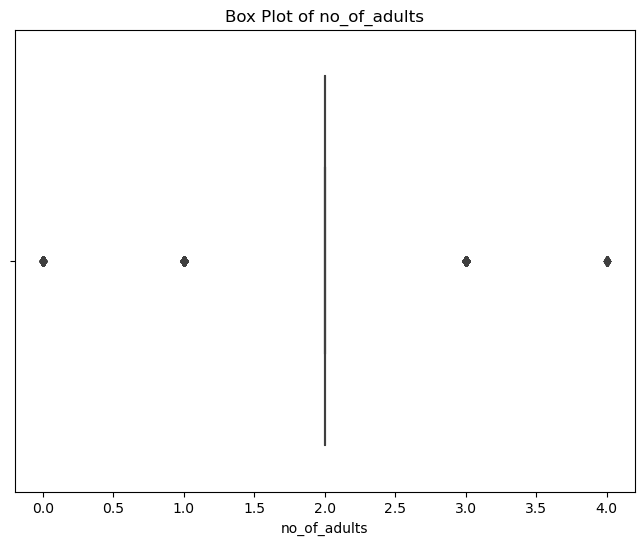

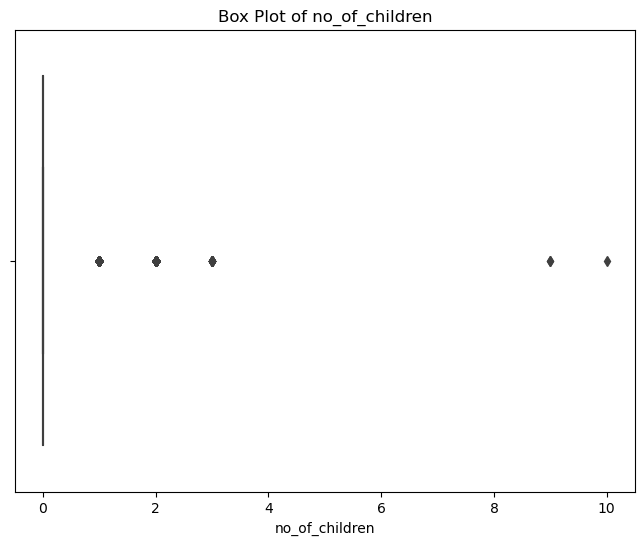

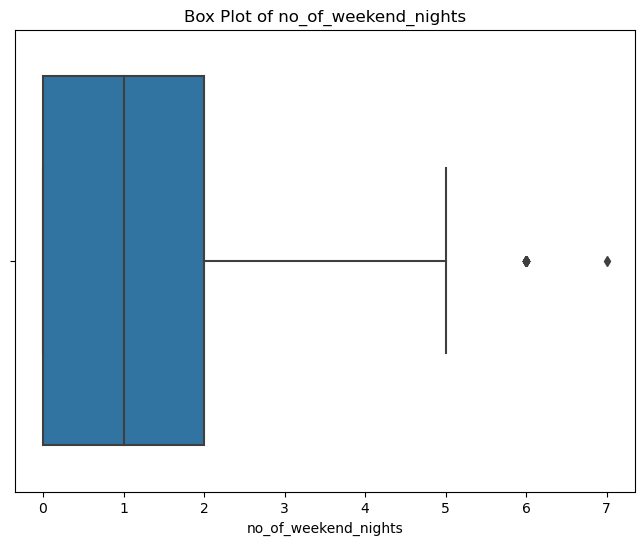

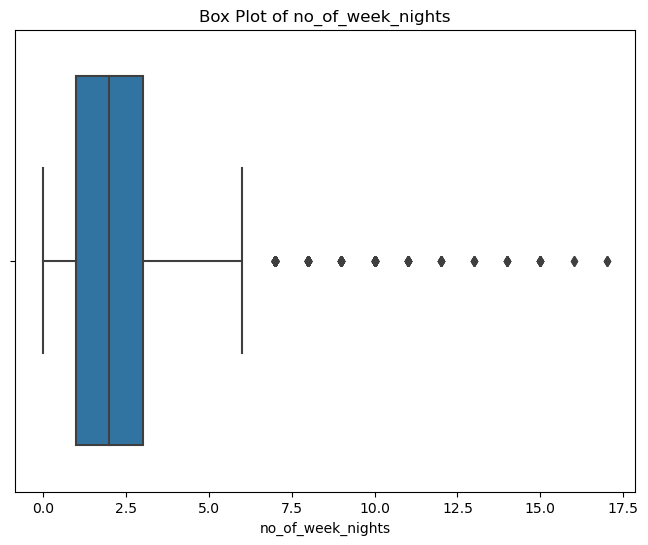

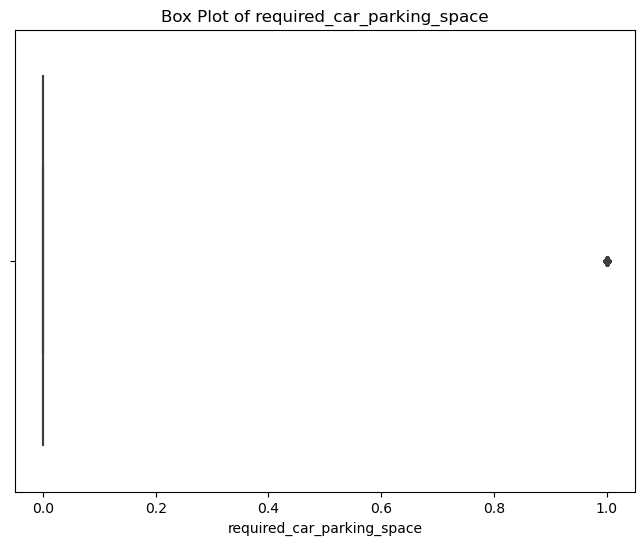

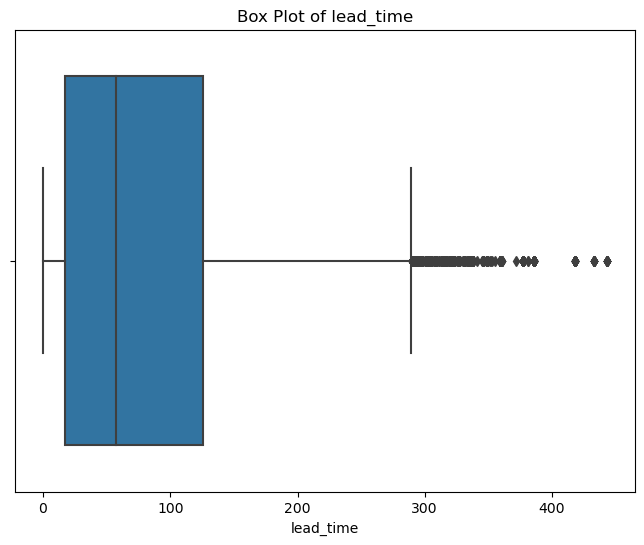

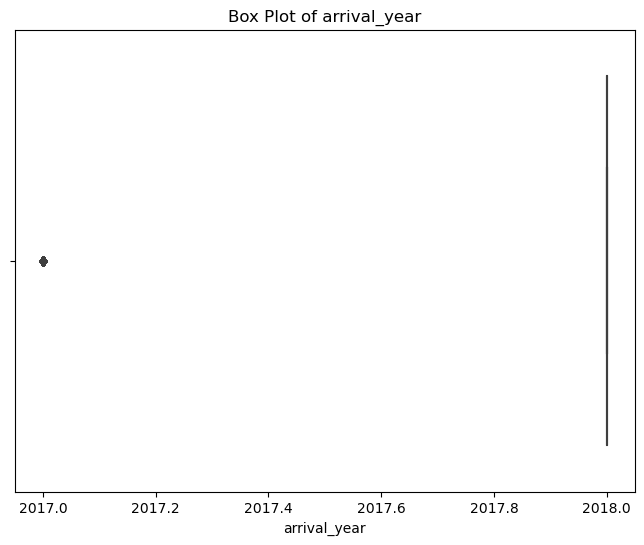

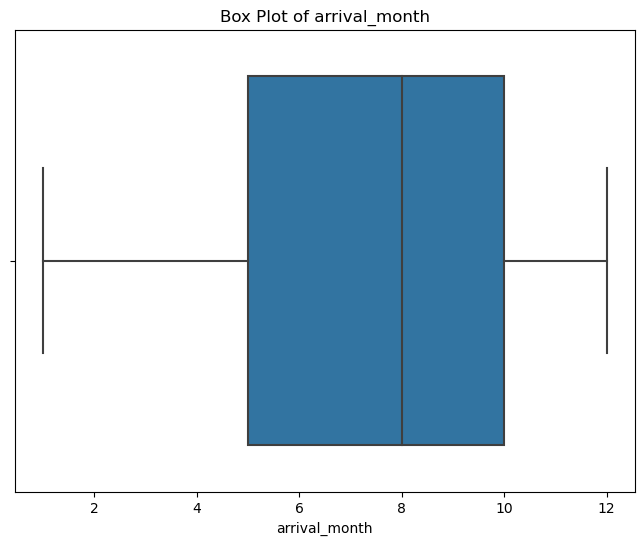

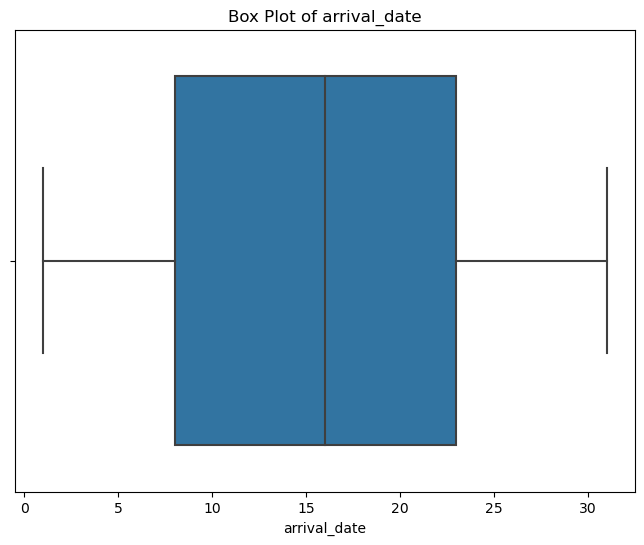

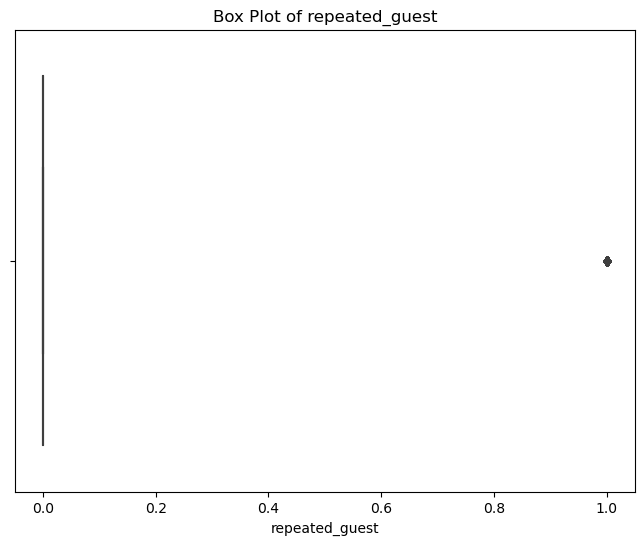

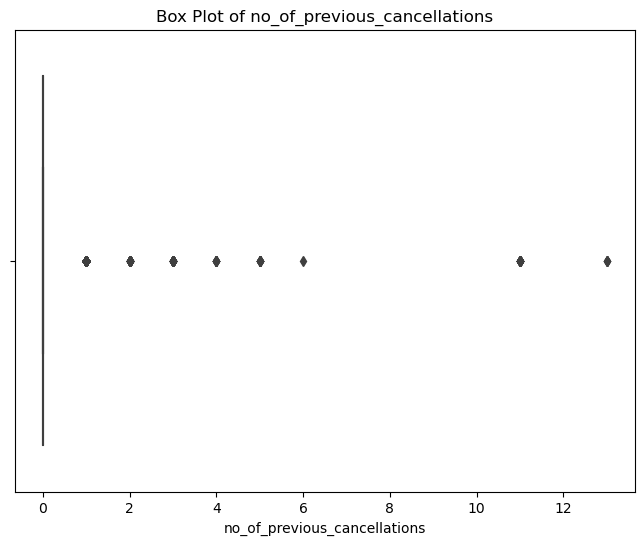

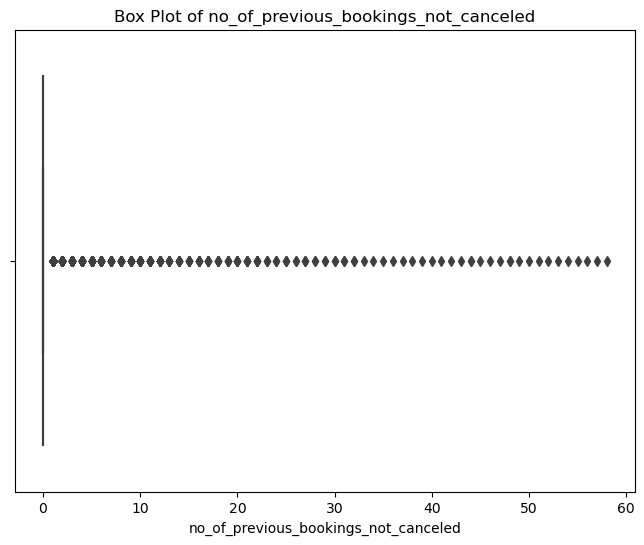

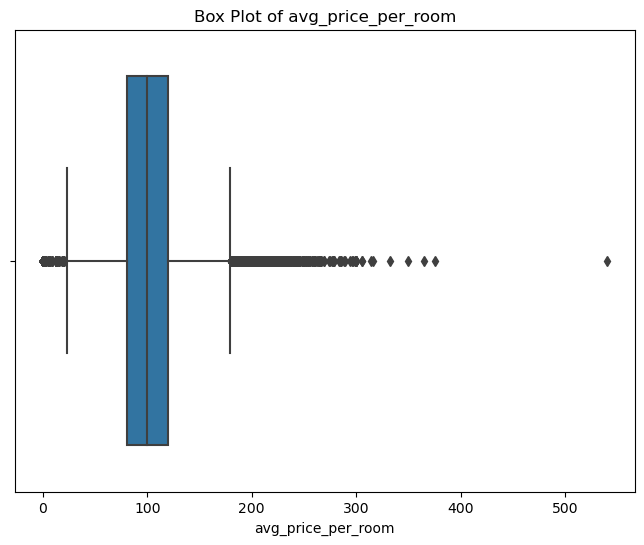

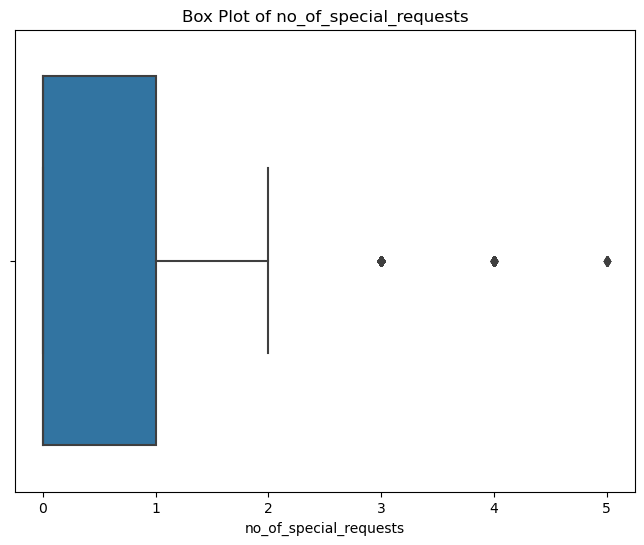

In [137]:
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns


for column in numerical_columns:
    plt.figure(figsize=(8, 6))  
    sns.boxplot(x=df[column])
    plt.title(f'Box Plot of {column}')
    plt.xlabel(column)
    plt.show()

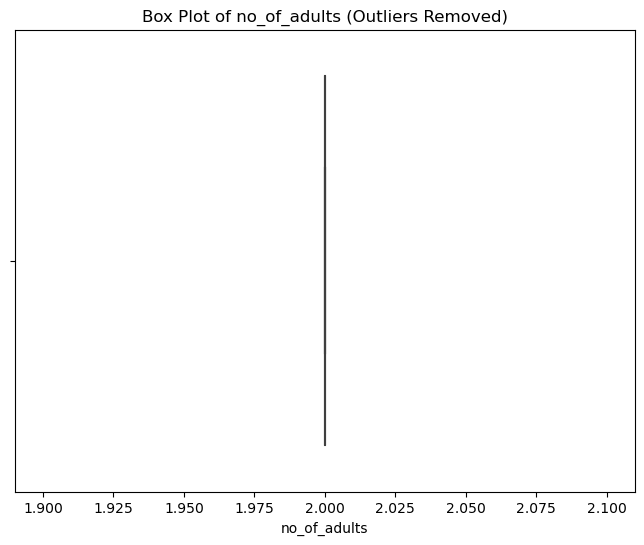

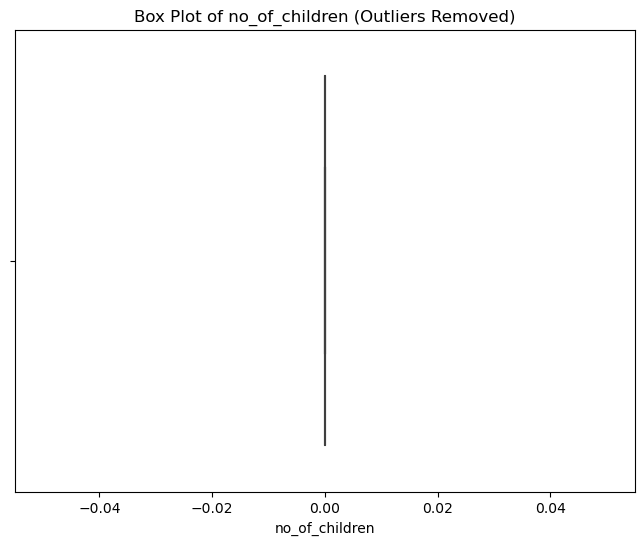

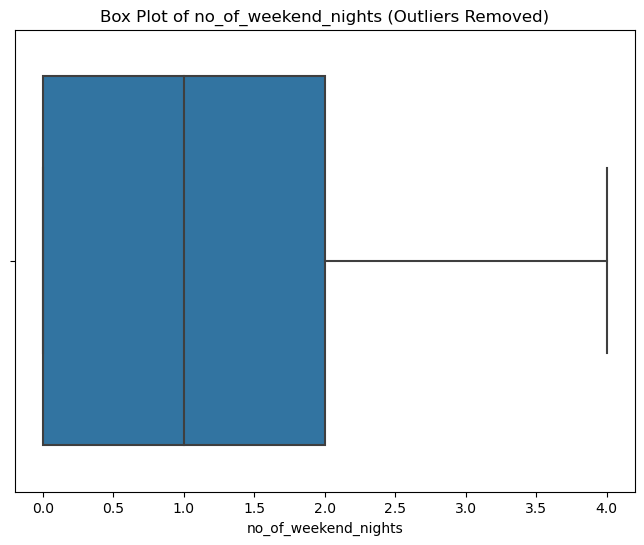

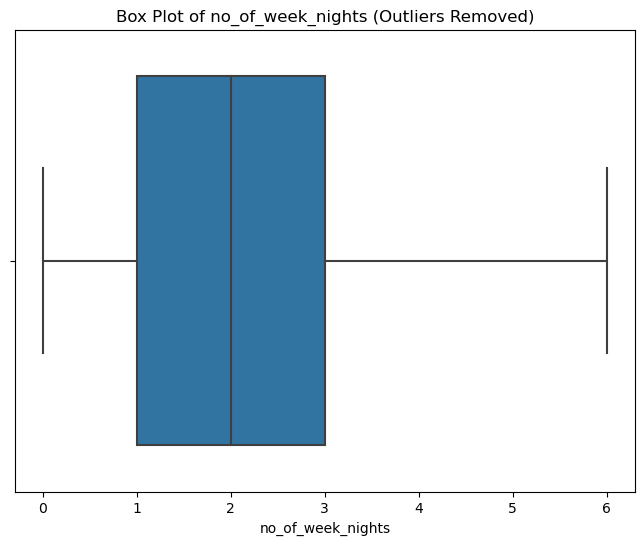

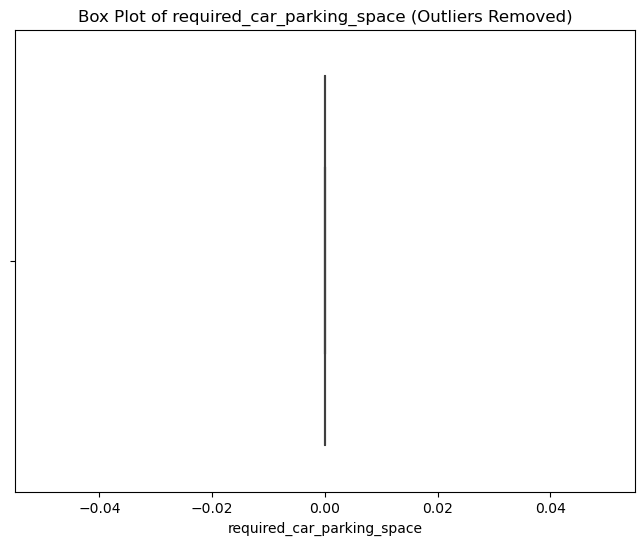

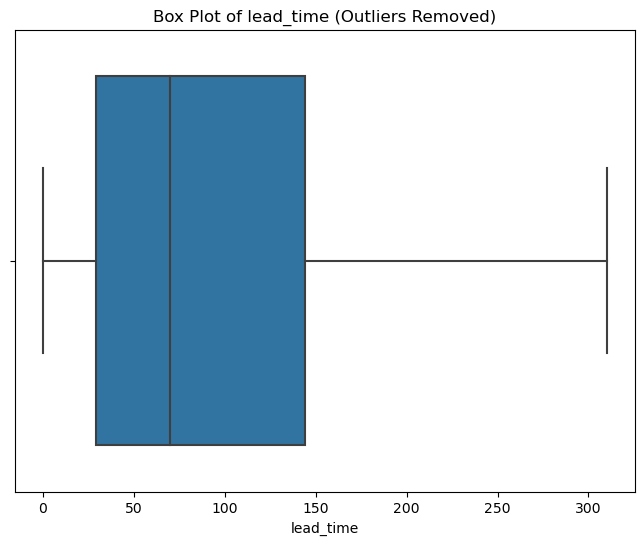

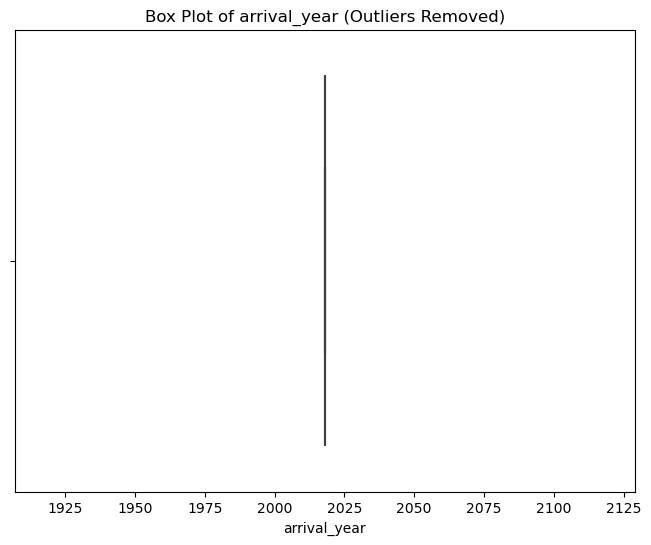

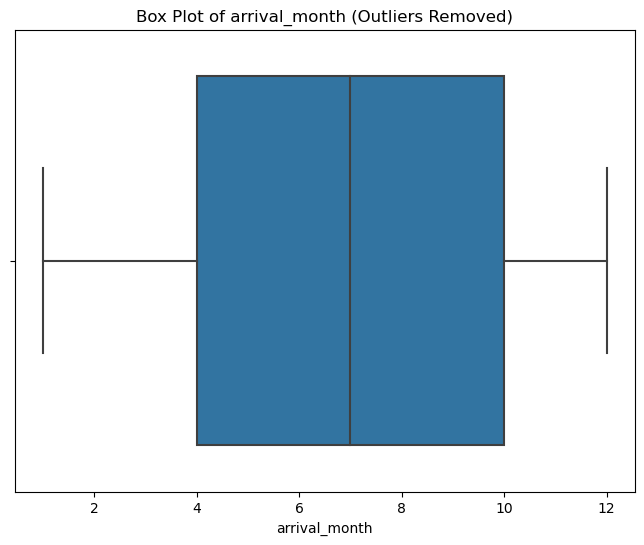

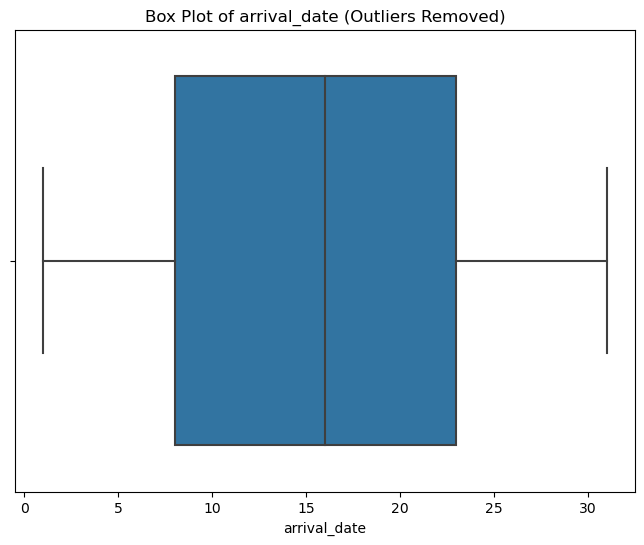

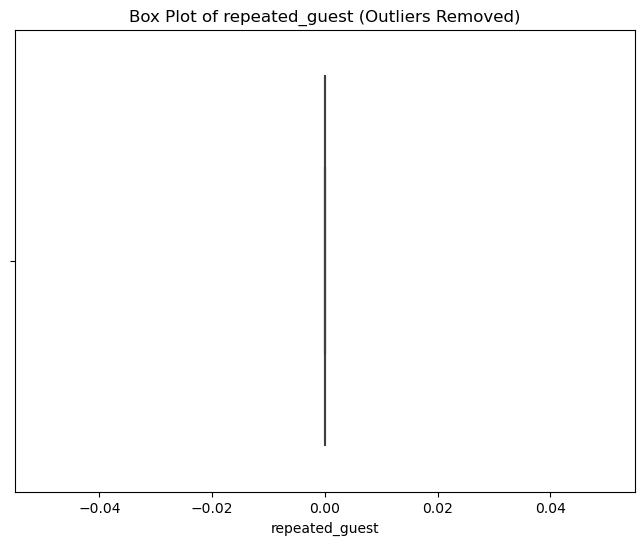

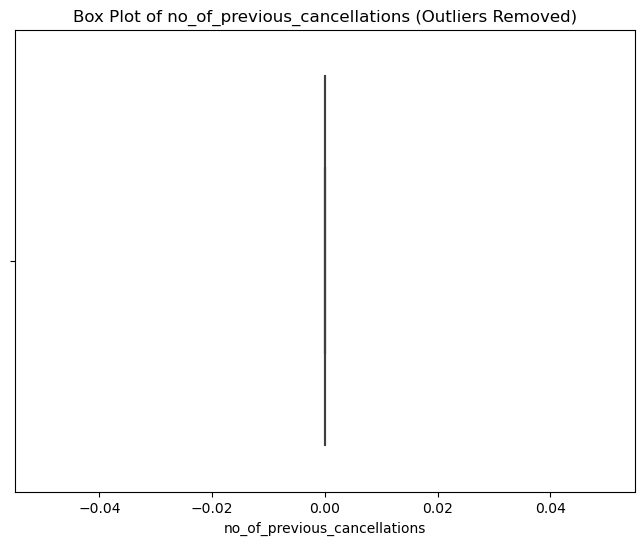

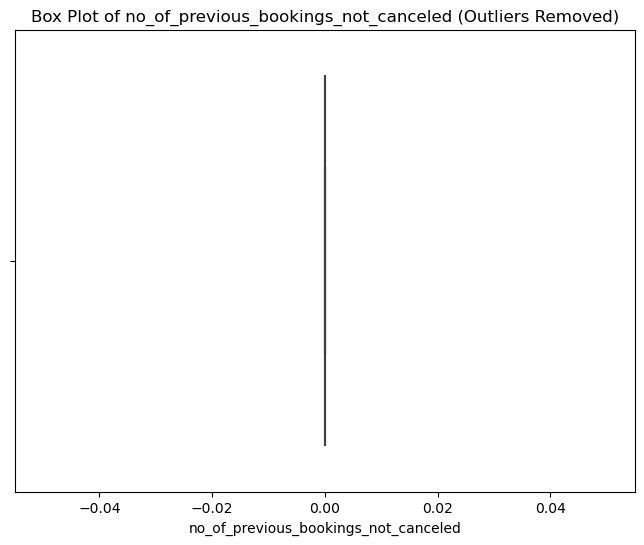

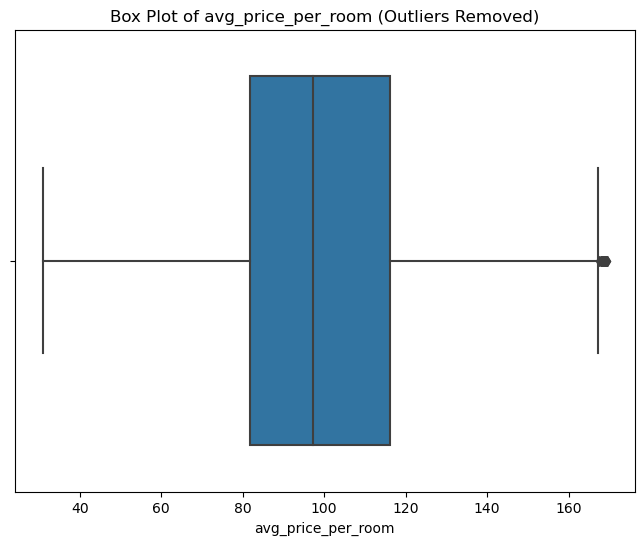

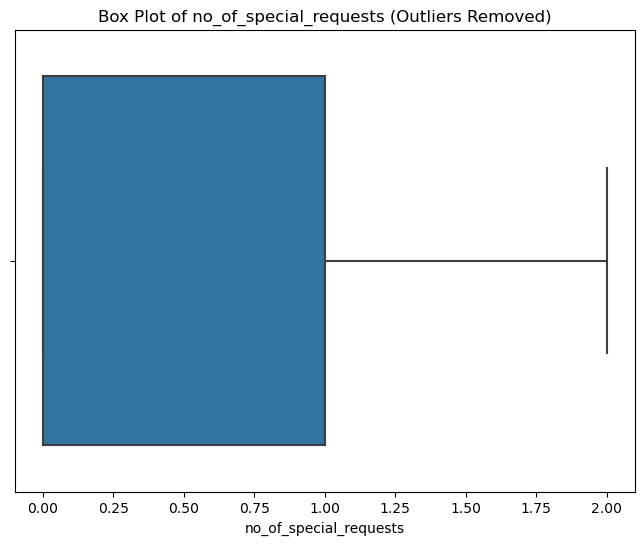

In [138]:
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns

# Remove outliers using the Interquartile Range (IQR) method
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df

# Create box plots for numerical columns after removing outliers
for column in numerical_columns:
    # Remove outliers from the column
    df = remove_outliers_iqr(df, column)

# Display box plots after removing outliers
for column in numerical_columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=df[column])
    plt.title(f'Box Plot of {column} (Outliers Removed)')
    plt.xlabel(column)
    plt.show()

In [139]:
categorical_columns = df.select_dtypes(include=['object']).columns

print("Categorical Columns:")
print(categorical_columns)

Categorical Columns:
Index(['Booking_ID', 'type_of_meal_plan', 'room_type_reserved',
       'market_segment_type', 'booking_status'],
      dtype='object')


In [140]:
for column in categorical_columns:
    unique_values = df[column].unique()
    print(f"Unique values in '{column}':")
    print(unique_values)
    print()

Unique values in 'Booking_ID':
['INN00002' 'INN00004' 'INN00005' ... 'INN36273' 'INN36274' 'INN36275']

Unique values in 'type_of_meal_plan':
['Not Selected' 'Meal Plan 1' 'Meal Plan 2']

Unique values in 'room_type_reserved':
['Room_Type 1' 'Room_Type 4' 'Room_Type 5' 'Room_Type 2' 'Room_Type 6'
 'Room_Type 3' 'Room_Type 7']

Unique values in 'market_segment_type':
['Online' 'Offline' 'Corporate' 'Complementary' 'Aviation']

Unique values in 'booking_status':
['Not_Canceled' 'Canceled']



In [141]:
label_encoder = LabelEncoder()

# Perform LabelEncoding for each categorical column
for column in categorical_columns:
    df[column] = label_encoder.fit_transform(df[column])


print(df)

       Booking_ID  no_of_adults  no_of_children  no_of_weekend_nights  \
1               0             2               0                     2   
3               1             2               0                     0   
4               2             2               0                     1   
7               3             2               0                     1   
12              4             2               0                     2   
...           ...           ...             ...                   ...   
36267       17153             2               0                     1   
36271       17154             2               0                     1   
36272       17155             2               0                     2   
36273       17156             2               0                     0   
36274       17157             2               0                     1   

       no_of_week_nights  type_of_meal_plan  required_car_parking_space  \
1                      3                  2     

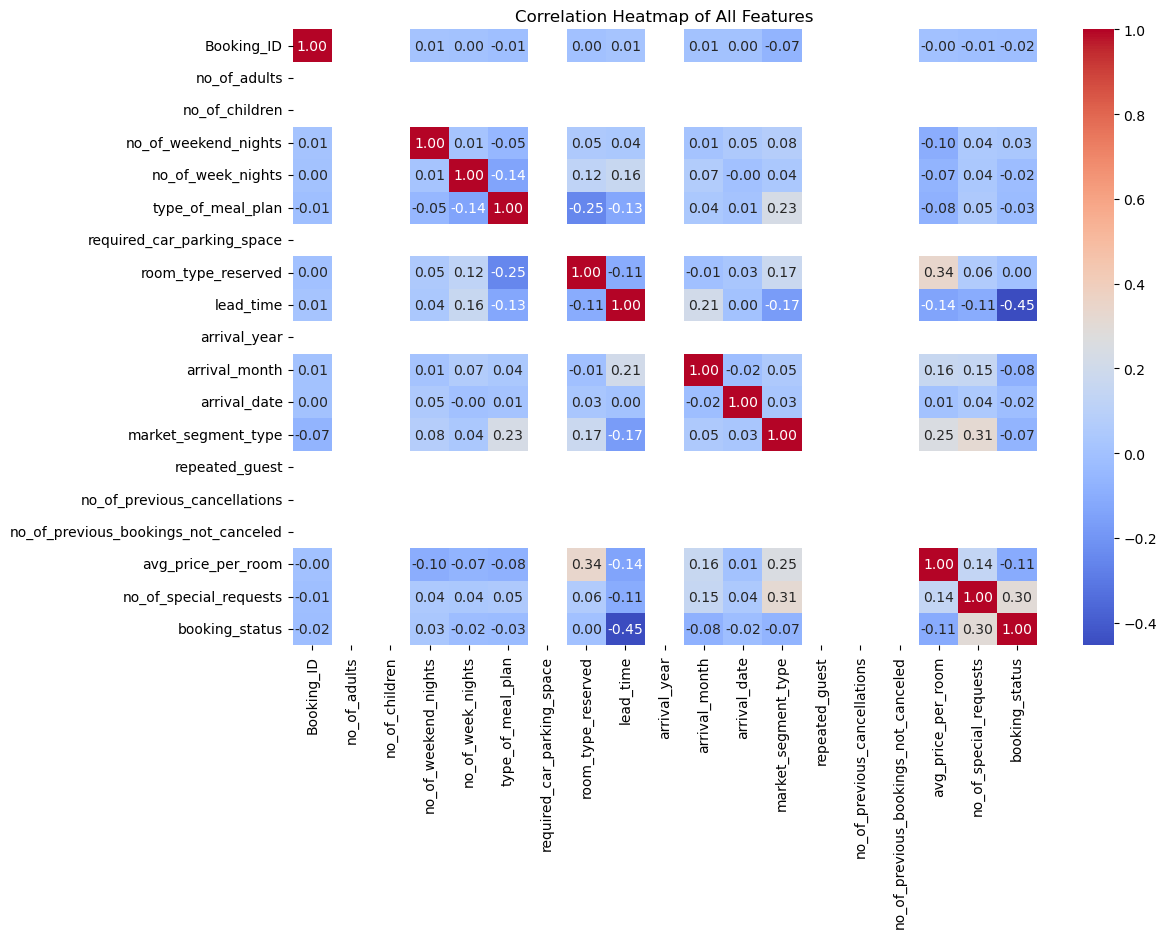

In [142]:
correlation_matrix = df.corr()

# Create a heatmap
plt.figure(figsize=(12, 8))  # Set the size of the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of All Features')
plt.show()

In [143]:
label_encoder = LabelEncoder()
df['booking_status'] = label_encoder.fit_transform(df['booking_status'])

# Identify numerical columns (excluding the label column)
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
numerical_columns = numerical_columns.drop('booking_status')  # Exclude label column

# Compute the correlation of numerical columns with the label column
correlation_with_label = df[numerical_columns].corrwith(df['booking_status'])

# Display correlation values
print("Correlation with 'booking_status':")
print(correlation_with_label)

Correlation with 'booking_status':
Booking_ID                             -0.020627
no_of_adults                                 NaN
no_of_children                               NaN
no_of_weekend_nights                    0.029672
no_of_week_nights                      -0.024354
type_of_meal_plan                      -0.033261
required_car_parking_space                   NaN
room_type_reserved                      0.000434
lead_time                              -0.453484
arrival_year                                 NaN
arrival_month                          -0.078781
arrival_date                           -0.020239
market_segment_type                    -0.070918
repeated_guest                               NaN
no_of_previous_cancellations                 NaN
no_of_previous_bookings_not_canceled         NaN
avg_price_per_room                     -0.107895
no_of_special_requests                  0.300043
dtype: float64


In [144]:
label_encoder = LabelEncoder()
df['booking_status'] = label_encoder.fit_transform(df['booking_status'])

# Compute the correlation of each column with 'booking_status'
correlation_with_label = df.corr()['booking_status'].abs().sort_values(ascending=False)

# Define a correlation threshold (adjust as needed)
correlation_threshold = 0.1  # For example

# Identify columns with correlation below the threshold
columns_to_remove = correlation_with_label[correlation_with_label < correlation_threshold].index.tolist()

# Remove the columns with low correlation to 'booking_status'
df = df.drop(columns=columns_to_remove, axis=1)


In [145]:
df

,no_of_adults,no_of_children,required_car_parking_space,lead_time,arrival_year,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
1,2,0,0,5,2018,0,0,0,106.68,1,1
3,2,0,0,211,2018,0,0,0,100.00,0,0
4,2,0,0,48,2018,0,0,0,94.50,0,0
7,2,0,0,83,2018,0,0,0,105.61,1,1
12,2,0,0,30,2018,0,0,0,88.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
36267,2,0,0,49,2018,0,0,0,93.15,0,0
36271,2,0,0,228,2018,0,0,0,90.95,2,0
36272,2,0,0,148,2018,0,0,0,98.39,2,1
36273,2,0,0,63,2018,0,0,0,94.50,0,0


In [146]:
label_column = 'booking_status'  # Replace with your label column name
target = df[label_column]  # Extract the labels
features = df.drop(columns=[label_column]) 

In [147]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

In [148]:
# Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)
dt_predictions = dt_classifier.predict(X_test)
dt_accuracy = accuracy_score(y_test, dt_predictions)
print(f"Decision Tree Classifier Accuracy: {dt_accuracy:.4f}")


Decision Tree Classifier Accuracy: 0.8167


In [149]:
# Classification report for Decision Tree Classifier
print("Classification Report for Decision Tree Classifier:")
print(classification_report(y_test, dt_predictions))

Classification Report for Decision Tree Classifier:
              precision    recall  f1-score   support

           0       0.75      0.78      0.77      1326
           1       0.86      0.84      0.85      2106

    accuracy                           0.82      3432
   macro avg       0.81      0.81      0.81      3432
weighted avg       0.82      0.82      0.82      3432



In [150]:
# K-Nearest Neighbors Classifier
knn_classifier = KNeighborsClassifier()
knn_classifier.fit(X_train, y_train)
knn_predictions = knn_classifier.predict(X_test)
knn_accuracy = accuracy_score(y_test, knn_predictions)
print(f"KNN Classifier Accuracy: {knn_accuracy:.4f}")

KNN Classifier Accuracy: 0.7809


/Users/javedhussain/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [151]:
# Classification report for K-Nearest Neighbors Classifier
print("Classification Report for KNN Classifier:")
print(classification_report(y_test, knn_predictions))

Classification Report for KNN Classifier:
              precision    recall  f1-score   support

           0       0.74      0.66      0.70      1326
           1       0.80      0.86      0.83      2106

    accuracy                           0.78      3432
   macro avg       0.77      0.76      0.76      3432
weighted avg       0.78      0.78      0.78      3432



In [152]:
# Logistic Regression
logistic_regression = LogisticRegression(random_state=42, max_iter=1000)
logistic_regression.fit(X_train, y_train)
logistic_predictions = logistic_regression.predict(X_test)
logistic_accuracy = accuracy_score(y_test, logistic_predictions)
print(f"Logistic Regression Accuracy: {logistic_accuracy:.4f}")

Logistic Regression Accuracy: 0.7748


In [105]:
# Classification report for Logistic Regression
print("Classification Report for Logistic Regression:")
print(classification_report(y_test, logistic_predictions))

Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.74      0.56      0.64      1326
           1       0.76      0.87      0.81      2106

    accuracy                           0.75      3432
   macro avg       0.75      0.72      0.73      3432
weighted avg       0.75      0.75      0.75      3432



In [ ]:
# features were selected based on their correlation to label or target variable 